In [1]:
import numpy as np
print('numpy imported')

numpy imported


In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
mpl.style.use('ggplot')

In [3]:
import pandas as pd
print('pandas imported')

pandas imported


In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [6]:
df = pd.read_csv("https://cocl.us/datascience_survey_data",
                delimiter=None, header='infer', names=None, index_col= 0, usecols=None, squeeze=False, 
                prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, 
                false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, 
                keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False,
                infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, 
                lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, 
                encoding=None, dialect=None, error_bad_lines=True,
                warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [7]:
print(df.dtypes)

Very interested        int64
Somewhat interested    int64
Not interested         int64
dtype: object


In [8]:
df['Very interested'] = df['Very interested'].astype(float)

In [9]:
df['Somewhat interested'] = df['Somewhat interested'].astype(float)

In [10]:
df['Not interested'] = df['Not interested'].astype(float)

In [11]:
print(df.dtypes)

Very interested        float64
Somewhat interested    float64
Not interested         float64
dtype: object


In [12]:
df_percentage = ((df/2233)*100)
df_percentage

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),59.650694,32.646664,5.687416
Data Analysis / Statistics,75.593372,19.883565,2.686968
Data Journalism,19.211823,48.410210,27.317510
Data Visualization,60.008957,32.870578,4.567846
Deep Learning,56.560681,34.482759,6.090461
Machine Learning,72.951187,21.361397,3.313927


In [13]:
pd.options.display.float_format = "{:,.2f}".format

In [14]:
df_sorted = df_percentage.sort_values(by= ['Very interested','Somewhat interested','Not interested'], ascending=False, na_position='first')


In [15]:
df_sorted

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


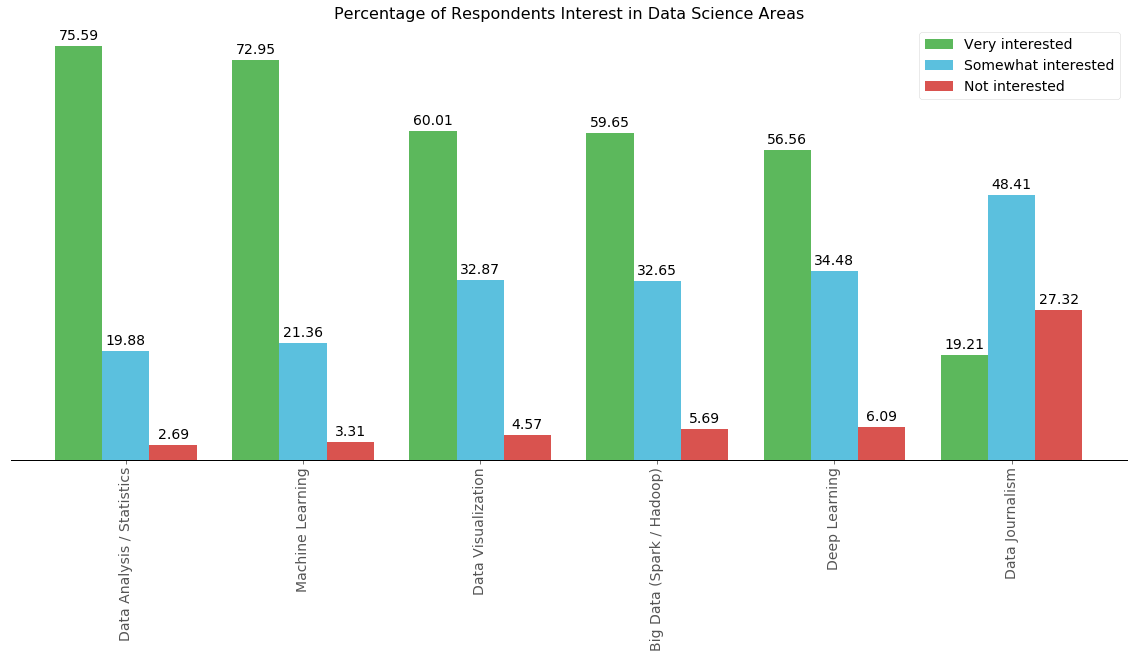

In [16]:
ax = df_sorted.plot(kind ='bar', alpha = 1, figsize = (20, 8), width = 0.8, color = ['#5cb85c', '#5bc0de', '#d9534f'], fontsize =14)

ax.set_title('Percentage of Respondents Interest in Data Science Areas', fontsize  = 16)
ax.legend(facecolor = 'white',fontsize = 14)
ax.get_yaxis().set_visible(False)
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')

for v in ax.patches:
    ax.annotate(np.round(v.get_height(),decimals=2), (v.get_x()+v.get_width()/2., v.get_height()),  ha='center', va='center',  xytext=(0, 10), textcoords='offset points', fontsize = 14 )
